## Redes Neurais Artificiais - Primeiros passos

## Base de dados :

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('aula01-dataset.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Análise visual dos dados :

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

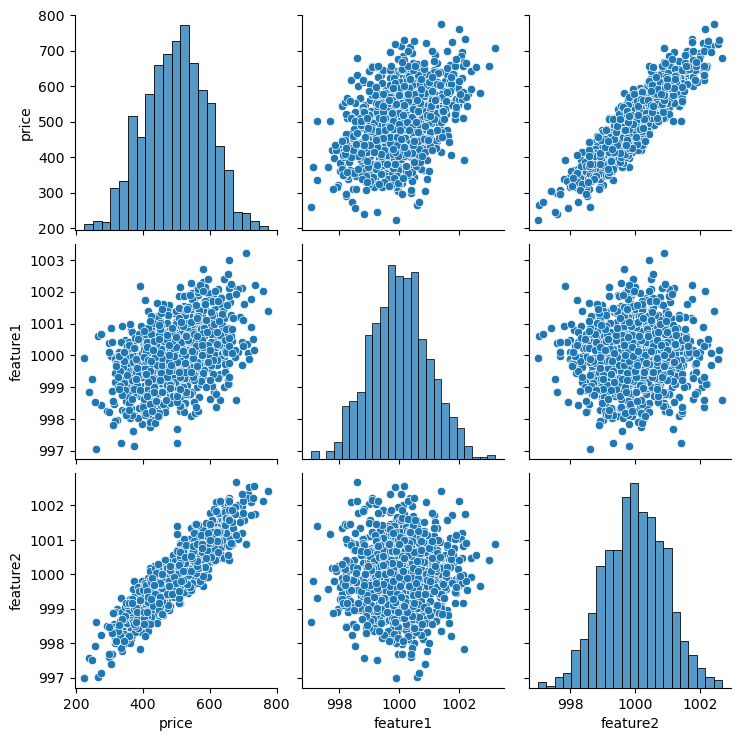

In [5]:
sns.pairplot(df)

## Separação da base em treinamento e teste :

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Features
X = df[['feature1','feature2']].values

# Target
y = df['price'].values

# Treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
y_train.shape

(700,)

In [11]:
y_test.shape

(300,)

## Normalização das features :

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## TensorFlow 2.0 syntax

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

## Desenvolvimento do modelo

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [21]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# "neuronio final"
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [22]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255301.3125   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256530.0469 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 260948.5000
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254314.5000 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 265857.5938 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 258808.5781
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257293.7188 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256456.7344 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257408.0469 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 253580.6719
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255509.2031 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253740.4219 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 252608.2188
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3683.9341 
Epoch 78/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2534.2800 
Epoch 79/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1732.4156
Epoch 80/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1698.8104 
Epoch 81/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1545.4969 
Epoch 82/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1581.1837 
Epoch 83/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1567.3519 
Epoch 84/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1463.1854 
Epoch 85/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1496.7074 
Epoch 86/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1531.6240 
Epoch 87/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 1445.3317
Epoch 88/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1477.6322 
Epoch 89/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1354.5117 
Epoch 90/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1242.7498
Epoch 91/250
22/22 ━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 93.0233
Epoch 155/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 90.8830  
Epoch 156/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.4377 
Epoch 157/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79.6728  
Epoch 158/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.9343 
Epoch 159/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 67.8301
Epoch 160/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60.3548 
Epoch 161/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 54.5146
Epoch 162/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.4437 
Epoch 163/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.1103 
Epoch 164/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.4037 
Epoch 165/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.2596 
Epoch 166/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.2430 
Epoch 167/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34.6292 
Epoch 168/250
22/22 ━━━━━━━━━

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 24.0572
Epoch 233/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 25.8113
Epoch 234/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.1055 
Epoch 235/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0339 
Epoch 236/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.5129 
Epoch 237/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.1102 
Epoch 238/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24.8540 
Epoch 239/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.4418 
Epoch 240/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.3627 
Epoch 241/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6549 
Epoch 242/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 24.8347
Epoch 243/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 22.8333
Epoch 244/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 25.4900
Epoch 245/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 26.9639
Epoch 246/250
22/22 ━━━━━━━━

## Validação do modelo :

In [23]:
model.history.history

{'loss': [256549.125,
  256369.0,
  256166.78125,
  255925.890625,
  255646.65625,
  255320.609375,
  254946.578125,
  254519.65625,
  254037.375,
  253495.359375,
  252892.6875,
  252224.234375,
  251487.75,
  250679.796875,
  249798.53125,
  248842.515625,
  247809.28125,
  246684.6875,
  245481.671875,
  244192.953125,
  242817.0,
  241342.484375,
  239768.109375,
  238104.78125,
  236333.84375,
  234472.015625,
  232495.171875,
  230419.390625,
  228242.515625,
  225945.640625,
  223538.0625,
  221031.125,
  218366.171875,
  215564.6875,
  212603.21875,
  209474.375,
  206188.984375,
  202742.1875,
  199145.4375,
  195372.1875,
  191432.703125,
  187326.78125,
  183040.0,
  178600.671875,
  173982.640625,
  169187.765625,
  164239.796875,
  159119.59375,
  153836.265625,
  148402.703125,
  142838.09375,
  137085.140625,
  131227.34375,
  125248.7578125,
  119148.4453125,
  113003.8984375,
  106709.2109375,
  100308.046875,
  93912.625,
  87490.984375,
  81065.3046875,
  74639.24218

In [24]:
loss = model.history.history['loss']

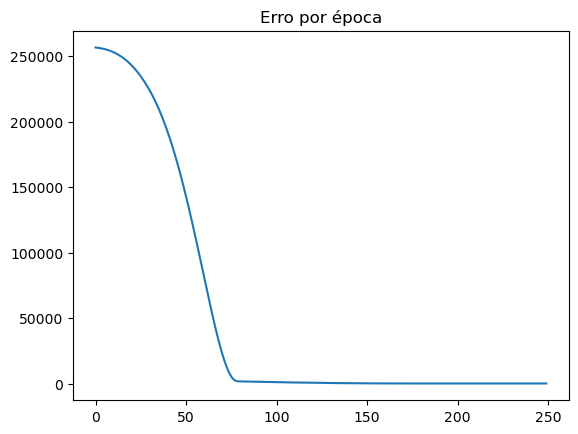

In [25]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Erro por época");

## Comparação do MSE no treinamento e teste :

In [26]:
model.metrics_names

['loss']

In [27]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [28]:
training_score

26.029813766479492

In [29]:
test_score

28.802825927734375

## Outras validações :

In [30]:
import numpy as np

In [31]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [32]:
pred_df = pd.DataFrame(y_test,columns=['y_test'])
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['y_test','modelo']
pred_df

,y_test,modelo
0,402.296319,406.780731
1,624.156198,625.793762
2,582.455066,594.290894
3,578.588606,574.267151
4,371.224104,367.907715
...,...,...
295,525.704657,530.939941
296,502.909473,517.101685
297,612.727910,611.864624
298,417.569725,418.517212


<Axes: xlabel='y_test', ylabel='modelo'>

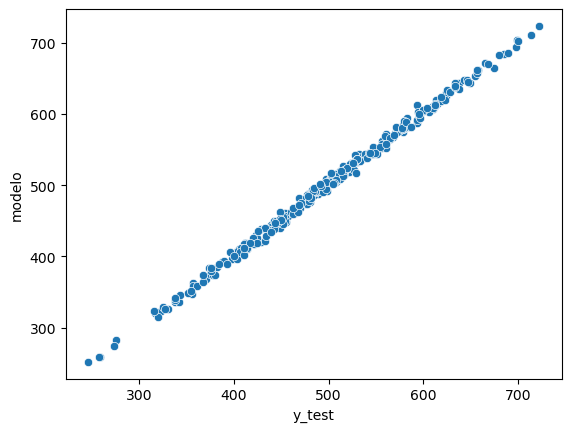

In [33]:
sns.scatterplot(x='y_test',y='modelo',data=pred_df)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mean_absolute_error(y_test, test_predictions)

4.361391843200391

In [36]:
mean_squared_error(y_test, test_predictions)

28.802826253169076

In [37]:
print('Valor do RMSE =', np.sqrt(mean_squared_error(y_test, test_predictions)))

Valor do RMSE = 5.366826460131637


## API :

In [38]:
# [[Feature1, Feature2]]
novo_dado = [[998 , 1000]]

In [39]:
scaler.transform(novo_dado)

array([[0.14117652, 0.53968792]])

In [40]:
novo_dado = scaler.transform(novo_dado)

In [41]:
print('Valor estimado pelo modelo =', model.predict(novo_dado)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Valor estimado pelo modelo = 421.1679


## Salvando o modelo :

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save('my_model.keras')

In [44]:
later_model = load_model('my_model.keras')

In [45]:
print('Valor estimado pelo modelo salvo =', later_model.predict(novo_dado)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Valor estimado pelo modelo salvo = 421.1679
